In [1]:
import pandas as pd

In [93]:
c=pd.read_csv("clusters.csv",index_col=[0])

In [94]:
c

,company,balanc,discount,divers,food,free coff,free lunch,gym,health,ice cream,...,sign bonus,stock option,stress,student loan pay,surf,vacat,women,work environ,work home,yoga
0,3M,45.0,10.0,41.0,0.0,-1.0,0.0,3.0,11.0,0.0,...,0.0,3.0,-5.0,0.0,-2.0,-4.0,-4.0,20.0,0.0,1.0
1,AECOM,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0
2,AT&T,2.0,30.0,8.0,-1.0,0.0,0.0,0.0,12.0,0.0,...,0.0,0.0,-35.0,0.0,0.0,16.0,1.0,19.0,1.0,0.0
3,AbbVie,57.0,0.0,-23.0,0.0,0.0,0.0,3.0,6.0,0.0,...,0.0,-2.0,-18.0,0.0,-1.0,8.0,-1.0,-8.0,-1.0,0.0
4,Abbott Laboratories,9.0,5.0,-1.0,0.0,2.0,2.0,2.0,42.0,0.0,...,0.0,3.0,-13.0,0.0,1.0,14.0,-2.0,29.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Wells Fargo,36.0,2.0,5.0,1.0,1.0,0.0,1.0,18.0,0.0,...,0.0,-1.0,-21.0,0.0,0.0,9.0,0.0,21.0,0.0,0.0
177,WestRock,-10.0,0.0,-8.0,4.0,0.0,1.0,0.0,6.0,0.0,...,0.0,0.0,-6.0,0.0,0.0,4.0,-2.0,16.0,0.0,0.0
178,Whirlpool,83.0,12.0,27.0,1.0,0.0,0.0,0.0,-6.0,0.0,...,0.0,0.0,-10.0,0.0,0.0,12.0,-13.0,34.0,0.0,0.0
179,World Fuel Services,2.0,0.0,1.0,-1.0,1.0,0.0,10.0,-3.0,0.0,...,0.0,0.0,-2.0,0.0,0.0,0.0,-2.0,-7.0,1.0,-1.0


In [95]:
#.drop('0', axis=0)
c=c.set_index('company') #in order to perform PCA

how many principal components?

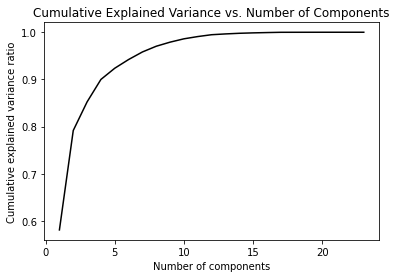

In [96]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline  

pca = PCA(c.shape[1]) #min between number of samples and features

table_pca_transformed = pca.fit_transform(c)

plt.plot(range(1, c.shape[1]+1), pca.explained_variance_ratio_.cumsum(), 'k')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance ratio")
plt.title("Cumulative Explained Variance vs. Number of Components");

Exploring silhouette


For n_clusters = 2 The average silhouette_score is : 0.3343970718580015
For n_clusters = 3 The average silhouette_score is : 0.28000293411565086
For n_clusters = 4 The average silhouette_score is : 0.2717810506098207
For n_clusters = 5 The average silhouette_score is : 0.2896393019074154
For n_clusters = 6 The average silhouette_score is : 0.23949277185278128
For n_clusters = 7 The average silhouette_score is : 0.23480022200638026
For n_clusters = 8 The average silhouette_score is : 0.2393554046626542
For n_clusters = 9 The average silhouette_score is : 0.23700368215347042
For n_clusters = 10 The average silhouette_score is : 0.23649722659073605


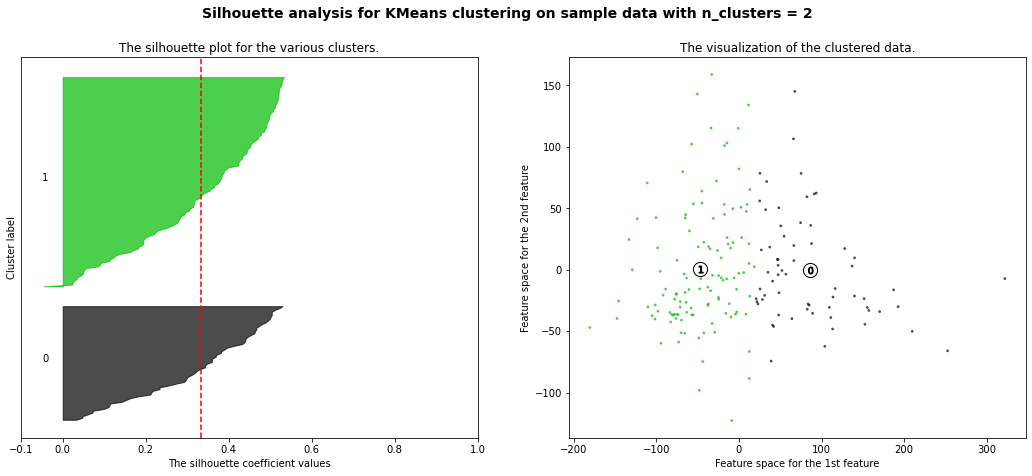

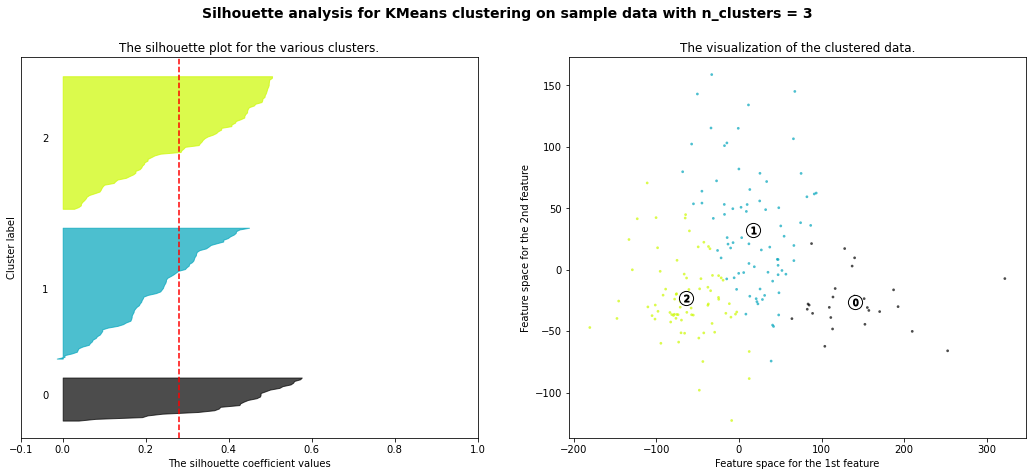

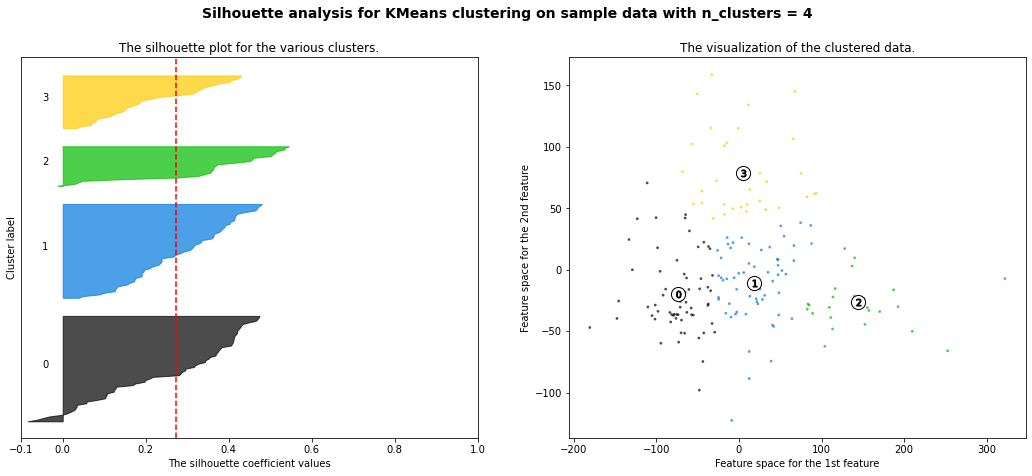

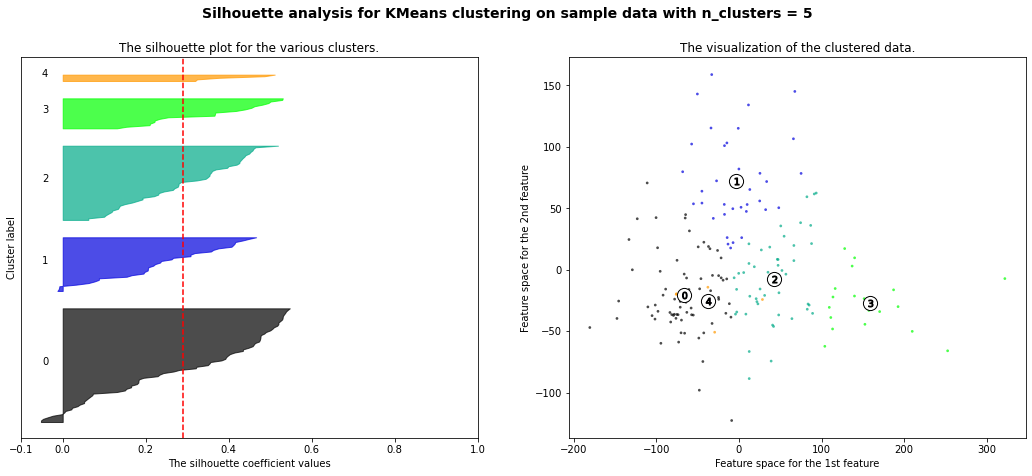

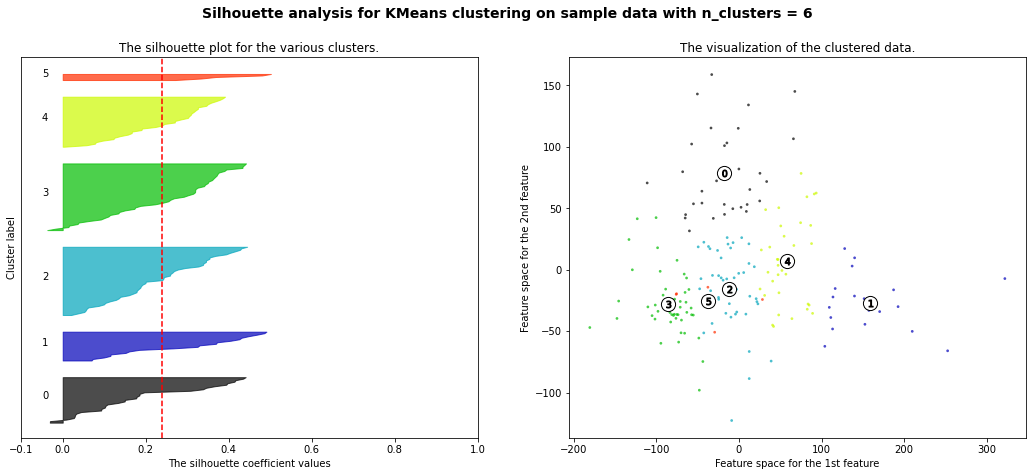

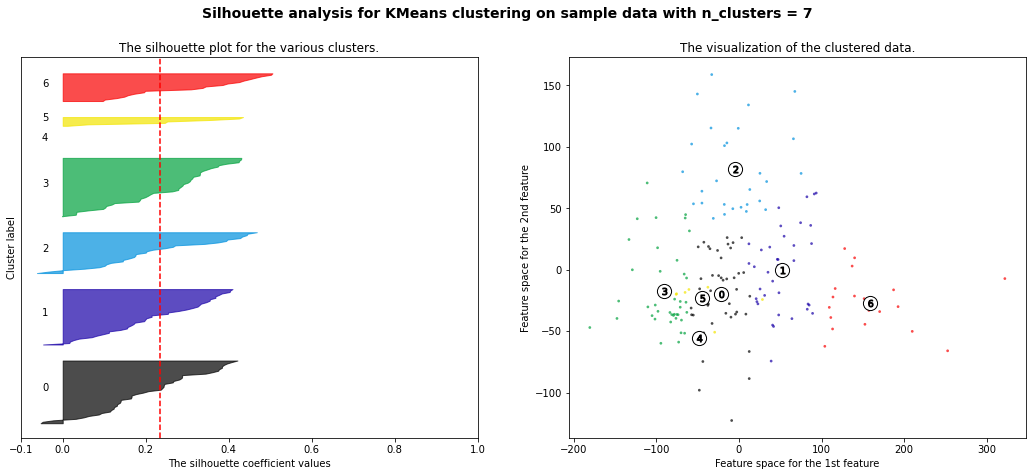

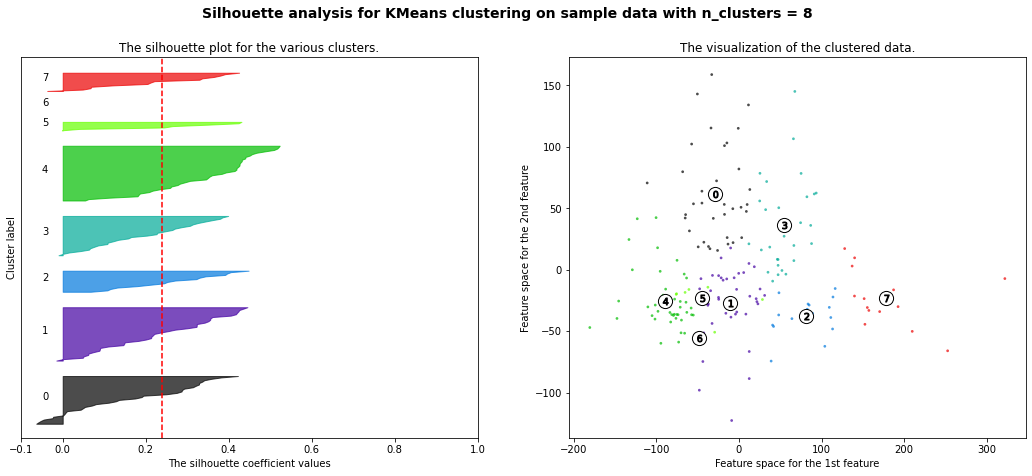

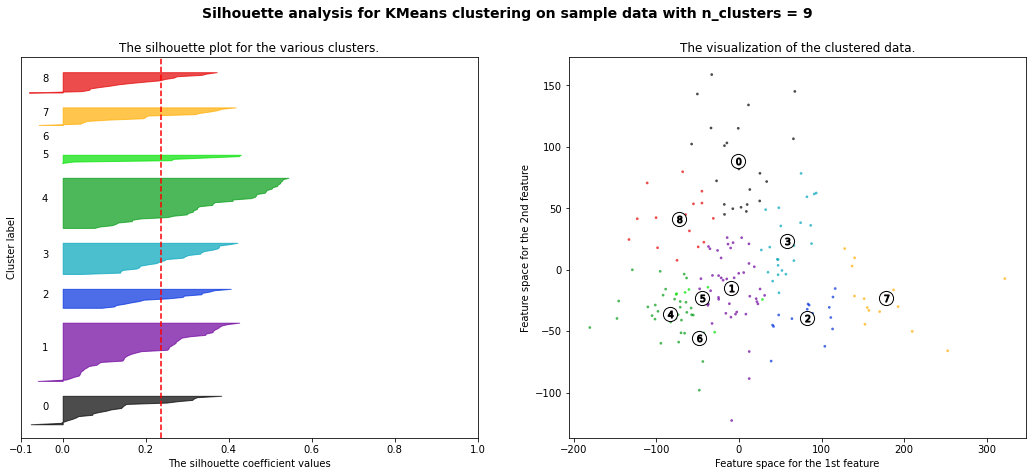

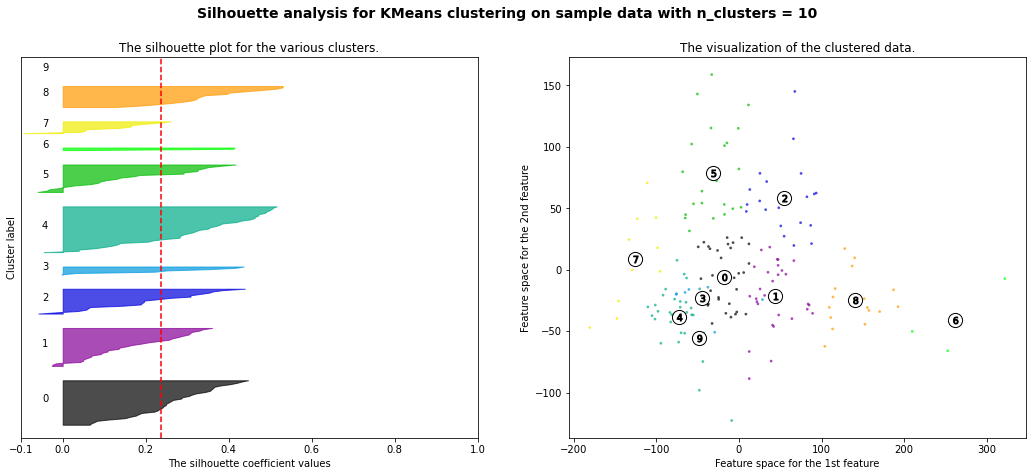

In [103]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans
X = table_pca_transformed
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

other Analyses

In [85]:
pip install altair

  Using cached altair-4.1.0-py3-none-any.whl (727 kB)



In [104]:

from sklearn.metrics import  davies_bouldin_score
km_scores= []
km_silhouette = []
km_db_score = []
for i in range(2,10): #min between number of samples and features

    km = KMeans(n_clusters=i, random_state=1301).fit(table_pca_transformed)
    preds = km.predict(table_pca_transformed)
    
    print(f'Score for number of cluster(s) {i}: {km.score(table_pca_transformed):.3f}')
    km_scores.append(-km.score(table_pca_transformed))
    
    silhouette = silhouette_score(table_pca_transformed,preds)
    km_silhouette.append(silhouette)
    print(f'Silhouette score for number of cluster(s) {i}: {silhouette:.3f}')
    
    db = davies_bouldin_score(table_pca_transformed,preds)
    km_db_score.append(db)
    print(f'Davies Bouldin score for number of cluster(s) {i}: {db:.3f}')
    
    print('-'*100)

Score for number of cluster(s) 2: -1255950.727
Silhouette score for number of cluster(s) 2: 0.334
Davies Bouldin score for number of cluster(s) 2: 1.115
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -988375.702
Silhouette score for number of cluster(s) 3: 0.282
Davies Bouldin score for number of cluster(s) 3: 1.188
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -828609.385
Silhouette score for number of cluster(s) 4: 0.272
Davies Bouldin score for number of cluster(s) 4: 1.157
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -746083.488
Silhouette score for number of cluster(s) 5: 0.287
Davies Bouldin score for number of cluster(s) 5: 1.062
----------------------------------------------------------------------------------------

In [105]:
import altair as alt
df_plot = pd.DataFrame({'Number of clusters':[i for i in range(2,10)],'kmean score': km_scores})
alt.Chart(df_plot).mark_line(point=True).encode(
    x=alt.X('Number of clusters:N', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('kmean score'),
    tooltip=[alt.Tooltip('kmean score', format='.2f')]
).properties(
    title='Kmean score ifo number of cluster'
).properties(
    title='The elbow method for determining number of clusters',
    width=400
)

alt.Chart(...)

In [106]:
df_plot = pd.DataFrame({'Number of clusters':[i for i in range(2,10)],'silhouette score': km_silhouette})
alt.Chart(df_plot).mark_line(point=True).encode(
    x=alt.X('Number of clusters:N', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('silhouette score'),
    tooltip=[alt.Tooltip('silhouette score', format='.2f')]
).properties(
    title='Silhouette  score ifo number of cluster',
    width=400
)

alt.Chart(...)

In [107]:
df_plot = pd.DataFrame({'Number of clusters':[i for i in range(2, 10)],'davies bouldin score': km_db_score})
alt.Chart(df_plot).mark_line(point=True).encode(
    x=alt.X('Number of clusters:N', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('davies bouldin score'),
    tooltip=[alt.Tooltip('davies bouldin score', format='.2f')]
).properties(
    title='Davies Bouldin score ifo number of cluster',
    width=400
)

alt.Chart(...)